In [ ]:
# -------------------------------------------
# HIERARCHICAL CLUSTERING FOR WEIGHT & HEIGHT
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
# -------------------------------------------
# 1. SAMPLE DATA (Weight in kg, Height in cm)
# -------------------------------------------
data = {
    "Weight": [45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
    "Height": [150, 155, 160, 162, 165, 170, 172, 175, 178, 180]
}

df = pd.DataFrame(data)
print("\nInput Data:")
print(df)


Input Data:
   Weight  Height
0      45     150
1      50     155
2      55     160
3      60     162
4      65     165
5      70     170
6      75     172
7      80     175
8      85     178
9      90     180


In [ ]:
# -------------------------------------------
# 2. FEATURE SCALING
# -------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [11]:
# -------------------------------------------
# 3. CREATE LINKAGE MATRIX
# -------------------------------------------
Z = linkage(scaled_data, method='ward')


In [ ]:
Z

array([[ 5.        ,  6.        ,  0.40712479,  2.        ],
       [ 2.        ,  3.        ,  0.40712479,  2.        ],
       [ 8.        ,  9.        ,  0.40712479,  2.        ],
       [ 0.        ,  1.        ,  0.63212148,  2.        ],
       [ 4.        , 11.        ,  0.77535467,  3.        ],
       [ 7.        , 10.        ,  0.77535467,  3.        ],
       [12.        , 15.        ,  1.73374576,  5.        ],
       [13.        , 14.        ,  2.0981314 ,  5.        ],
       [16.        , 17.        ,  5.52202781, 10.        ]])

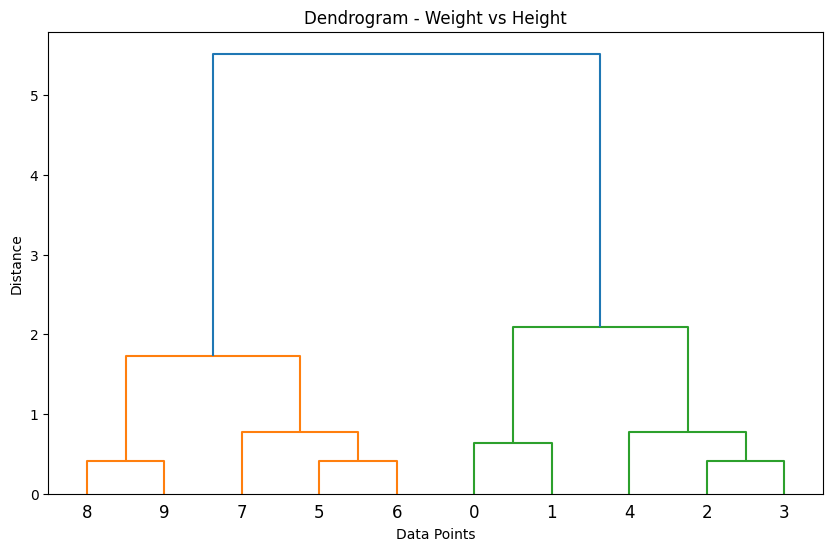

In [ ]:
# -------------------------------------------
# 4. DENDROGRAM
# -------------------------------------------
plt.figure(figsize=(10, 6))
plt.title("Dendrogram - Weight vs Height")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()


In [8]:

# -------------------------------------------
# 5. AGGLOMERATIVE CLUSTERING
# -------------------------------------------
hc = AgglomerativeClustering(
    n_clusters=3,      # Adjust based on dendrogram
    metric='euclidean',
    linkage='ward'
)

In [9]:
df["Cluster"] = hc.fit_predict(scaled_data)

print("\nClustered Data:")
print(df)


Clustered Data:
   Weight  Height  Cluster
0      45     150        2
1      50     155        2
2      55     160        1
3      60     162        1
4      65     165        1
5      70     170        0
6      75     172        0
7      80     175        0
8      85     178        0
9      90     180        0


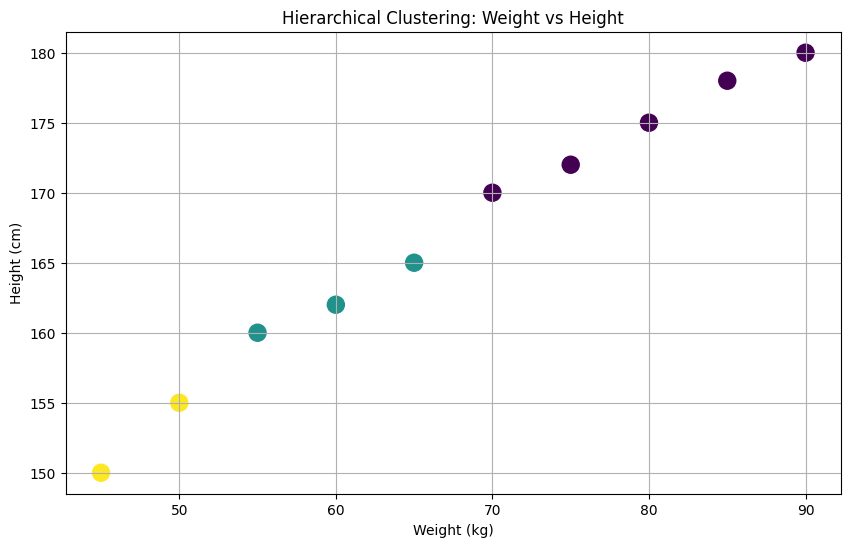

In [10]:
# -------------------------------------------
# 6. FINAL VISUALIZATION
# -------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Weight"], df["Height"],
    c=df["Cluster"], s=150
)

plt.title("Hierarchical Clustering: Weight vs Height")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.show()